In [85]:
import json
from tqdm import tqdm
import pandas as pd
import plotly.express as px
import numpy as np


In [ ]:
%run ../data_load/tariff_editor_client.py

In [27]:
from pprint import pprint

In [28]:
def load_token(token_name):
    with open(f'/home/victorshch/.{token_name}.txt') as f:
        return f.read().strip()
tariff_editor_client = TariffEditorClient(load_token('tariff_editor_token'))


In [4]:
with open('all_services.json', 'w') as f:
    f.write(all_services_json_str)

In [8]:
all_services_by_project_array = json.loads(all_services_json_str)

In [9]:
all_services_by_project_array

{'projects': [{'project_id': 2,
   'project_name': 'taxi',
   'services': [{'id': 355193, 'name': 'imports', 'cluster_type': 'conductor'},
    {'id': 355187, 'name': 'front', 'cluster_type': 'conductor'},
    {'id': 355191, 'name': 'eslogadminpy3', 'cluster_type': 'conductor'},
    {'id': 355192, 'name': 'imports-py3', 'cluster_type': 'conductor'},
    {'id': 355190, 'name': 'es-spans-master', 'cluster_type': 'conductor'},
    {'id': 355189, 'name': 'taxi-exam', 'cluster_type': 'conductor'},
    {'id': 355186, 'name': 'geo-api', 'cluster_type': 'conductor'},
    {'id': 355183, 'name': 'infra-tools', 'cluster_type': 'conductor'},
    {'id': 355119,
     'name': 'taxi-render-template',
     'cluster_type': 'conductor'},
    {'id': 355070,
     'name': 'passenger-authorizer-eu',
     'cluster_type': 'conductor'},
    {'id': 355071, 'name': 'driver-authproxy-eu', 'cluster_type': 'conductor'},
    {'id': 355069, 'name': 'mongos-proxy', 'cluster_type': 'conductor'},
    {'id': 355068, 'name'

In [29]:
example_health = tariff_editor_client.get_hejmdal_deps('139')
example_health.keys()

dict_keys(['service_info', 'health_stats', 'dependencies'])

In [31]:
example_health

{'inbound': [{'service_info': {'service_id': 354396,
    'service_name': 'api-admin',
    'project_id': 150,
    'project_name': 'taxi-devops',
    'cluster_type': 'conductor',
    'admin_page_link': 'https://tariff-editor.taxi.yandex-team.ru/services/150/edit/354396/info',
    'tvm_name': 'api-admin'},
   'health_stats': {'total_checks': 3, 'states': {'Ok': 3}, 'status': 'Ok'}},
  {'service_info': {'service_id': 1,
    'service_name': 'clownductor',
    'project_id': 150,
    'project_name': 'taxi-devops',
    'cluster_type': 'nanny',
    'admin_page_link': 'https://tariff-editor.taxi.yandex-team.ru/services/150/edit/1/info',
    'tvm_name': 'clownductor'},
   'health_stats': {'total_checks': 19, 'states': {'Ok': 19}, 'status': 'Ok'}},
  {'service_info': {'service_id': 354491,
    'service_name': 'taxi-approvals',
    'project_id': 150,
    'project_name': 'taxi-devops',
    'cluster_type': 'conductor',
    'admin_page_link': 'https://tariff-editor.taxi.yandex-team.ru/services/150/edi

In [36]:
for prj in tqdm(all_services_by_project_array['projects']):
    for service in tqdm(prj['services']):
        if 'deps_health' in service: continue
        try:
            service['deps_health'] = tariff_editor_client.get_hejmdal_deps(service['id'])
        except EntityNotFound:
            service_name = service['name']
            cluster_type = service['cluster_type']
            print(f'service {service_name} ({cluster_type}) not found')



  0%|          | 0/16 [00:00<?, ?it/s]


100%|██████████| 131/131 [00:00<00:00, 207262.85it/s]



100%|██████████| 114/114 [00:00<00:00, 437866.90it/s]



100%|██████████| 258/258 [00:00<00:00, 670049.80it/s]



100%|██████████| 188/188 [00:00<00:00, 1241778.19it/s]



  0%|          | 0/228 [00:00<?, ?it/s]


 77%|███████▋  | 176/228 [00:00<00:00, 440.06it/s]

service yaga-metrolog (conductor) not found





 83%|████████▎ | 190/228 [00:07<00:06,  6.11it/s] 


 88%|████████▊ | 200/228 [00:13<00:07,  3.69it/s]


 91%|█████████ | 207/228 [00:16<00:07,  3.00it/s]


 93%|█████████▎| 212/228 [00:19<00:06,  2.43it/s]


 95%|█████████▍| 216/228 [00:21<00:04,  2.46it/s]


 95%|█████████▍| 216/228 [00:31<00:04,  2.46it/s]


 96%|█████████▌| 219/228 [00:32<00:13,  1.47s/it]


 96%|█████████▋| 220/228 [00:33<00:09,  1.20s/it]


 97%|█████████▋| 221/228 [00:34<00:06,  1.00it/s]


 97%|█████████▋| 222/228 [00:34<00:04,  1.22it/s]


 98%|█████████▊| 223/228 [00:34<00:03,  1.49it/s]


 98%|█████████▊| 224/228 [00:35<00:02,  1.59it/s]


 99%|█████████▊| 225/228 [00:36<00:02,  1.48it/s]


 99%|█████████▉| 226/228 [00:36<00:01,  1.59it/s]


100%|█████████▉| 227/228 [00:38<00:00,  1.17it/s]


100%|██████████| 228/228 [00:38<00:00,  5.93it/s]


 31%|███▏      | 5/16 [00:38<01:24,  7.69s/it]


  0%|          | 0/57 [00:00<?, ?it/s]


  2%|▏         | 1/57 [00:00<00:23,  2.43it/s]


  4%|▎         | 2/57 [00

In [63]:
def status_to_color(status):
    return {
        'Ok': 'green',
        'Warning': 'yellow',
        'Critical': 'red',
    }.get(status, 'grey')

In [92]:
status_to_color_map = {
        'Ok': 'green',
        'Warning': 'yellow',
        'Critical': 'red',
        '(?)': 'grey',
    }

In [97]:
def get_display_name(service):
    if service['cluster_type'] == 'nanny': return service['name']
    cluster_type_short = {
        'postgres': 'pg',
        'conductor': 'con',
        'mongo_lxc': 'mongo',
        'mongo_mdb': 'mongo',
        'redis_lxc': 'redis',
        'redis_mdb': 'redis',
    }
    return service['name'] + '@' + cluster_type_short.get(service['cluster_type'], service['cluster_type'])

In [98]:
services_tbl = []
for prj in all_services_by_project_array['projects']:
    for service in prj['services']:
        service_row = {
            'name': service['name'],
            'display_name': get_display_name(service),
            'project_name': prj['project_name'],
            'cluster_type': service['cluster_type'],
        }
        if 'deps_health' in service:
            service_row['inbound_count'] = len(service['deps_health']['dependencies'].get('inbound', []))
            service_row['status'] = service['deps_health']['health_stats']['status']
            service_row['color'] = status_to_color(service['deps_health']['health_stats']['status'])
            services_tbl.append(service_row)

In [99]:
len(services_tbl)

1738

In [100]:
services_tbl[1]

{'name': 'front',
 'display_name': 'front@con',
 'project_name': 'taxi',
 'cluster_type': 'conductor',
 'inbound_count': 0,
 'status': 'Ok',
 'color': 'green'}

In [101]:
df = pd.DataFrame(services_tbl)

In [106]:
df['value'] = np.log(2 + df['inbound_count'])

In [107]:
df

,name,display_name,project_name,cluster_type,inbound_count,status,color,value
0,imports,imports@con,taxi,conductor,0,Ok,green,0.693147
1,front,front@con,taxi,conductor,0,Ok,green,0.693147
2,eslogadminpy3,eslogadminpy3@con,taxi,conductor,1,Ok,green,1.098612
3,imports-py3,imports-py3@con,taxi,conductor,0,Ok,green,0.693147
4,es-spans-master,es-spans-master@con,taxi,conductor,0,Ok,green,0.693147
...,...,...,...,...,...,...,...,...
1733,bank-communications,bank-communications,finservices,nanny,0,Ok,green,0.693147
1734,bank_cashback_processing,bank_cashback_processing@pg,finservices,postgres,1,Ok,green,1.098612
1735,psptmp,psptmp,trust,nanny,1,Ok,green,1.098612
1736,xpay,xpay,trust,nanny,0,Ok,green,0.693147


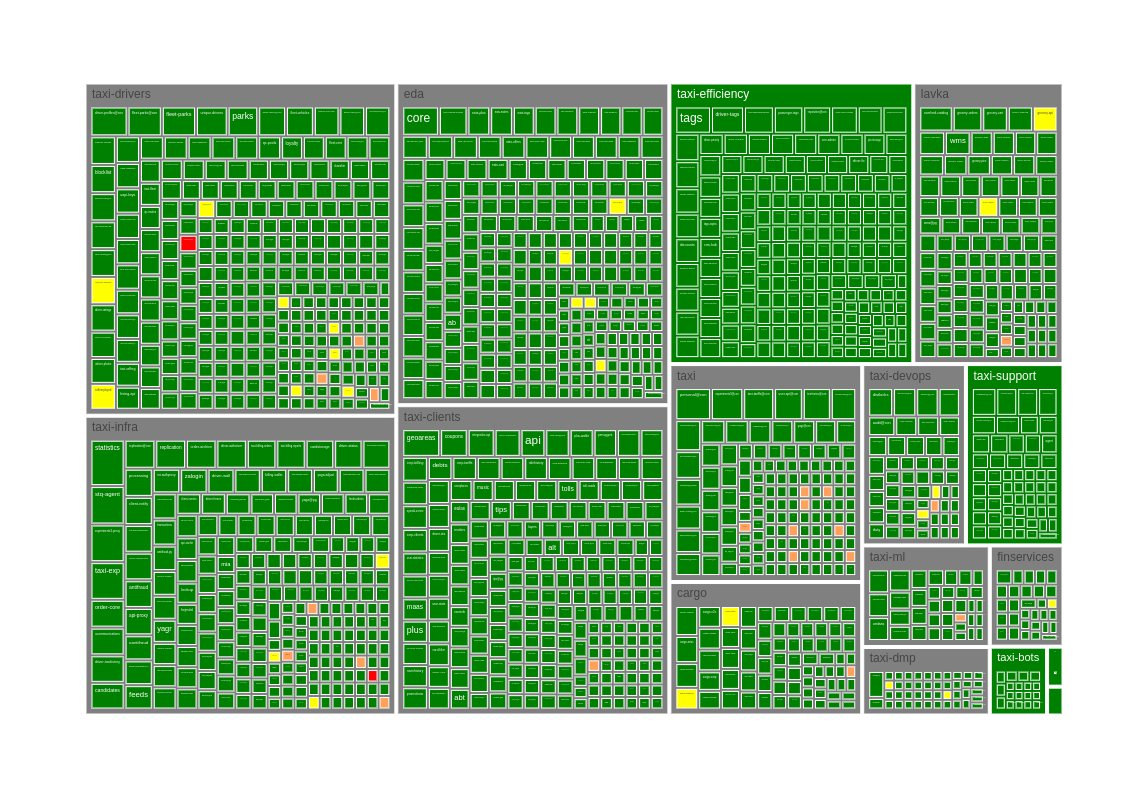

In [108]:
px.treemap(df, path=['project_name', 'display_name'], 
           values='value', 
           color='status', 
           color_discrete_map=status_to_color_map,
           width=1000, 
           height=800)